In [1]:
##Liberias

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import glob

In [68]:
#extrayendo data que proviene de 1. Cleaning-Resoluciones-Completas

DF = pd.read_csv("Total-data-resol.csv")
DF.sample(5)

,Año,Categoría,Materia,Número de resolución,Empresa denunciada,Criterios aplicables,Medios probatoriosCargo,Medios probatorios Descargo,Cuestiones,Normativa,Multas,Medidas correctivas,Configuración del Tribunal,Decisión
126,2010,Pérdida de equipaje,Idoneidad del servicio,1468-2010/SC2-INDECOPI,EMPRESA DE TRANSPORTES TURISMO REAL DEL SUR S....,Las multas coercitivas constituyen un instrume...,0,0,0,"DECRETO LEGISLATIVO N° 807 Facultades, normas ...",2 UIT,S/.862.50,Camilo Nicanor Carrillo Gómez Oscar Darío Arrú...,1
159,2011,Pérdida de equipaje,IDONEIDAD DEL SERVICIO TRANSPORTE TERRESTRE,1085-2011/SC2-INDECOPI,TURISMO SAN LUIS DEL SUR E.I.R.L.,"En el presente caso, la Comisión dispuso el in...",Denuncia policial por extravío de equipaje,0,0,Ley No. 27444 Ley del Procedimiento Administra...,0,0,Camilo Nicanor Carrillo Gómez Francisco Pedro ...,0
66,2008,Pérdida de equipaje,Idoneidad del servicio,0553-2008/TDC.INDECOPI,TRANSPORTES EL PINO S.A.C.,"Como se indicó en la sección antecedentes, med...",0,0,0,"DECRETO LEGISLATIVO N° 807 Facultades, normas ...",1 UIT Pago de costas y costos,0,Rosa María Graciela Ortiz Origgi Juan Ángel Ca...,1
200,2013,Pérdida de equipaje,RECURSO DE REVISIÓN,0060-2013/SPC-INDECOPI,JULSA ÁNGELES TOURS S.A.C.,Esta Sala no puede pronunciarse respecto a si ...,0,0,0,Código de Protección y Defensa del Consumidor ...,0,0,Julio Baltazar Durand Carrión Hernando Montoya...,0
26,2007,Pérdida de equipaje,Idoneidad del servicio,0791-2007/TDC.INDECOPI,TRANSPORTES CRUZ DEL SUR S.A.C.,El artículo 8° del Decreto Legislativo N° 7161...,Etiqueta de Guardianía Guia de control Acta de...,Contrato de custodia Pericia grafotécnica Decl...,0,"DECRETO LEGISLATIVO N° 807 Facultades, normas ...",0,0,Rosa María Graciela Ortiz Origgi Juan Ángel Ca...,0


In [69]:
DF["Criterios aplicables"]

0      la responsabilidad administrativa de Transport...
1      El punto de partida para demostrar la existenc...
2      Para el dictado de medidas correctivas, la aus...
3      la causa no imputable debe ser entendida como ...
4      Al contratar un servicio de transporte de carg...
                             ...                        
278    "En virtud de lo expuesto, en el presente caso...
279    "Sobre el particular, esta Sala no coincide co...
280    "De esta manera, al no haber quedado acreditad...
281    "Dicho esto, este Colegiado considera que el f...
282    "En tal sentido, la denunciada, en principio, ...
Name: Criterios aplicables, Length: 283, dtype: object

# Pre-procesamiento de las resoluciones

In [70]:
import re
from nltk.corpus import stopwords

In [71]:
def limpieza_texto(string):
    string = string.lower()
    string = string.replace("\n", " ")
    list_words = re.findall(r'[a-z0-9ñáéíóúü-]+', string)
    list_words = [x for x in list_words if x not in stopwords.words('spanish')]
    string = " ".join(list_words)
    return string

In [72]:
# re.findall(r'[a-z0-9ñáéíóúü-]+', "la resolución 123-a, con código asdf4.")
limpieza_texto("la resolución 123-a,\ncon código asdf4.")

'resolución 123-a código asdf4'

In [73]:
DF["Criterios aplicables limpio"] = \
    DF["Criterios aplicables"].apply(limpieza_texto)

In [74]:
DF.to_csv("total_data_clean.csv")

# Leer los datos con las nuevas variables

In [75]:
data = pd.read_csv("total_data_clean.csv")
data.head()

,Unnamed: 0,Año,Categoría,Materia,Número de resolución,Empresa denunciada,Criterios aplicables,Medios probatoriosCargo,Medios probatorios Descargo,Cuestiones,Normativa,Multas,Medidas correctivas,Configuración del Tribunal,Decisión,Criterios aplicables limpio
0,0,2006,Pérdida de equipaje,Idoneidad del servicio,0064-2006/TDC-INDECOPI,Empresa de Transporte Flores Hermanos S.R.L.,la responsabilidad administrativa de Transport...,Boleta por servicio de encomienda,Denuncia policial por hurto,Competencia Fuerza mayor,Reglamento Nacional de Ferrocarriles D. Suprem...,"0,50 UIT Pago de costas y costos",Pago de S/.850,Juan Francisco Rojas Leo Julio Balazar Durand ...,1,responsabilidad administrativa transportes flo...
1,1,2006,Pérdida de equipaje,Idoneidad del servicio,0071-2006/TDC-INDECOPI,PAREDES ESTRELLA CARGO S.A.,El punto de partida para demostrar la existenc...,0,0,"Competencia Fuerza mayor, caso fortuito",Ley No. 27181 Ley General de Transporte y Trán...,"0,5 UIT","Pago de S/.1,650",Juan Francisco Rojas Leo Julio Balazar Durand ...,1,punto partida demostrar existencia causa exima...
2,2,2006,Pérdida de equipaje,Idoneidad del servicio Gradación de la sanción,0142-2006/TDC-INDECOPI,EMPRESA DE TRANSPORTES SANTA ÚRSULA S.A.C,"Para el dictado de medidas correctivas, la aus...",0,0,0,Reglamento Nacional de Ferrocarriles D. Suprem...,"0,50 UIT",Pago de S/.850,Juan Francisco Rojas Leo Julio Balazar Durand ...,0,dictado medidas correctivas ausencia regulació...
3,3,2006,Pérdida de equipaje,Idoneidad del servicio,1335-2006/TDC-INDECOPI,Empresa de Transporte El Pino SAC (El Pino),la causa no imputable debe ser entendida como ...,Boleta de Venta,0,deber de custodia del equipaje,Ley de Aeronaútica Civil del Perú DECRETO LEGI...,"0,5 UIT Pago de costas y costos",Pago de S/. 966,Juan Francisco Rojas Leo Julio Balazar Durand ...,1,causa imputable debe ser entendida evento extr...
4,4,2006,Pérdida de equipaje,Idoneidad del servicio,1428-2006/TDC.INDECOPI,EMPRESA DE TRANSPORTES CARGO CAVASSA S.A.C.,Al contratar un servicio de transporte de carg...,0,Guia Boleta de Venta No. 51285,0,D. Supremo No. 009-2004-MTC Reglamento Naciona...,0,0,Juan Francisco Rojas Leo Julio Balazar Durand ...,0,contratar servicio transporte carga consumidor...


# Separación del conjunto de datos en entrenamiento y test

In [76]:
from sklearn.model_selection import train_test_split

# Separación del conjunto de datos en entrenamiento y test

X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Decisión", 
                                                            axis=1),
                                                    data["Decisión"],
                                                    test_size=0.2,
                                                    random_state=10)

print("training set size: ", X_train.shape[0])
print("test set size: ", X_test.shape[0])

training set size:  226
test set size:  57


# Análisis textual de los criterios aplicables

Determinar frequencia de los n-gramas. Si los n-gramas son muy poco frecuentes, entonces, el modelo podría empezar a tener problemas.



In [77]:
from nltk import ngrams

In [78]:
def extraer_bigramas(string, n):
    word_list = string.split()
    n_gramas = ngrams(word_list, n)
    return list(n_gramas)

In [79]:
data["Criterios aplicables limpio"] \
    .sample(5) \
    .apply(lambda x: extraer_bigramas(x, 2))

115    [(artículo, 8), (8, decreto), (decreto, legisl...
236    [(tal, señalado), (señalado, precedentemente),...
174    [(medios, probatorios), (probatorios, obrantes...
199    [(respecto, debe), (debe, destacarse), (destac...
63     [(artículo, 8), (8, decreto), (decreto, legisl...
Name: Criterios aplicables limpio, dtype: object

In [81]:
# Extracción de los n-gramas y análisis de su frecuencia

n = 2

dicc_n_gramas = {}

for sentence in data["Criterios aplicables limpio"]: 
    n_gramas = extraer_bigramas(sentence, n)
    # hallar ocurrencias únicas en los n-gramas para hallar el 
    # % de documentos que los contienen
    n_gramas = set(n_gramas)
    
    for x in n_gramas:
        if x in dicc_n_gramas.keys():
            dicc_n_gramas[x] = dicc_n_gramas[x] + 1
        else:
            dicc_n_gramas[x] = 1

In [82]:
dicc_n_gramas = [ (" ".join(k), v) for k,v in dicc_n_gramas.items()]

dicc_n_gramas = sorted(dicc_n_gramas, key=lambda x: x[1])
dicc_n_gramas

[('base guía', 1),
 ('flores prestación', 1),
 ('lado caso', 1),
 ('entregada aquella', 1),
 ('caso necesario', 1),
 ('necesario revisar', 1),
 ('rectificar contenido', 1),
 ('misma lado', 1),
 ('encomienda únicamente', 1),
 ('consignatario misma', 1),
 ('razonable entiende', 1),
 ('entiende encomienda', 1),
 ('solicitarla remitente', 1),
 ('revisar rectificar', 1),
 ('figura consignatario', 1),
 ('enviada consumidor', 1),
 ('remitente misma', 1),
 ('único podía', 1),
 ('podía solicitarla', 1),
 ('persona figura', 1),
 ('únicamente entregada', 1),
 ('ésta enviada', 1),
 ('naturaleza base', 1),
 ('encomienda ésta', 1),
 ('guía encomienda', 1),
 ('prestación entrega', 1),
 ('entiende único', 1),
 ('podido establecerse', 1),
 ('absolutamente previsible', 1),
 ('proveedor tomando', 1),
 ('existencia acontecimiento', 1),
 ('únicamente configura', 1),
 ('riesgo vicio', 1),
 ('hecho externo', 1),
 ('atípico valor', 1),
 ('hecho originó', 1),
 ('chofer vehículo', 1),
 ('vehículo transportaba',

In [83]:
ng_data = pd.DataFrame(dicc_n_gramas, columns=["n_grama", "freq"])
ng_data.sample(5)

,n_grama,freq
17132,precitado punto,1
21825,resulta jurídicamente,2
18545,comunicaciones registradas,1
9401,allí únicamente,1
11396,previsibles prestación,1


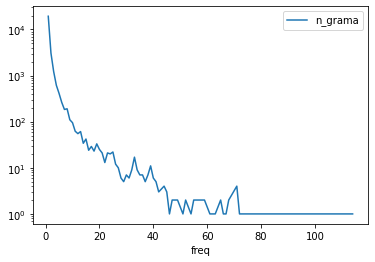

In [85]:
ng_data.groupby(by="freq").count().plot(logy=True, use_index=True);

In [86]:
t_filtro = (ng_data["freq"] <= 100) & (ng_data["freq"] >= 20)
ng_data[t_filtro].count()

n_grama    297
freq       297
dtype: int64

In [87]:
print(f"cantidad de {n}-gramas extraídos: {len(dicc_n_gramas)}")
print(f"n-grama con frecuencia máxima: {dicc_n_gramas[-1]}")

cantidad de 2-gramas extraídos: 26105
n-grama con frecuencia máxima: ('servicio transporte', 114)


In [88]:
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [142]:
column_trans_exmpl = ColumnTransformer([
        
    # Applicar una transformación CountVectorizer a la columna 'Criterios aplicables'  
    ('criterios_aplicables_n_gramas', 
     CountVectorizer(
         # tamaño del vocabulario. Top max_features ordenados por la frecuencia
         # de términos
         # max_features = 5,
         # rango de números que espefica el tamaño de los n-gramas a extraer
         ngram_range = (2, 2),
         # eliminar tokens que aparezcan en más del X% de los documentos 
         # tal vez no ofrezcan capacidad de discriminación
         #max_df = 0.8,   
         # eliminar tokens que aparezcan en menos del X% de los documentos
         # muy poco frecuentes
         #min_df = 0.05
     ), 
     'Criterios aplicables limpio') # Criterios aplicables limpio
    ],
    
    # ignore the remaining columns
    remainder='drop')

#column_trans.fit(DF)
#column_trans.get_feature_names()

In [143]:
# aprender el diccionario de tokens a partir del conjunto de datos de 
# entrenamiento
column_trans_exmpl.fit(X_train);

In [144]:
# acceder al vocabulario aprendido por el Count Vectorizer
n_grams_voc = column_trans_exmpl.transformers_[0][1].vocabulary_

print(f"Número de n-gramas en el vocabulario: {len(n_grams_voc)}")

Número de n-gramas en el vocabulario: 21388


In [146]:
n_grams_voc

{'artículo 42': 2273,
 '42 decreto': 527,
 'decreto legislativo': 6416,
 'legislativo 716': 12285,
 '716 establece': 627,
 'establece facultad': 9342,
 'facultad comisión': 9995,
 'comisión ordenar': 3935,
 'ordenar proveedores': 14286,
 'proveedores imposición': 16346,
 'imposición medidas': 11184,
 'medidas correctivas': 12871,
 'correctivas favor': 5313,
 'favor consumidores4': 10059,
 'consumidores4 finalidad': 4918,
 'finalidad medidas': 10229,
 'correctivas revertir': 5325,
 'revertir efectos': 17854,
 'efectos conducta': 8111,
 'conducta infractora': 4218,
 'infractora causó': 11725,
 'causó consumidor': 3469,
 'consumidor evitar': 4785,
 'evitar futuro': 9529,
 'futuro ésta': 10472,
 'ésta produzca': 21192,
 'produzca nuevamente': 16099,
 'nuevamente denunciante': 13791,
 'denunciante acreditado': 6919,
 'acreditado transportes': 939,
 'transportes salazar': 20271,
 'salazar tomado': 18088,
 'tomado declaración': 19962,
 'declaración objetos': 6366,
 'objetos valor': 13929,
 'v

In [145]:
t_var = column_trans_exmpl.transformers_[0][1].transform(X_train).toarray()
np.unique(t_var)

array([0, 1], dtype=int64)

# Especificación del modelo

In [114]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [133]:
column_trans = ColumnTransformer([
        
    # Applicar una transformación CountVectorizer a la columna 
    #'Criterios aplicables'  
    ('CritAplLim_CountVectorizer', CountVectorizer(), 
         'Criterios aplicables limpio')
    ],
    
    # ignore the remaining columns
    remainder='drop')

In [134]:
# Especificacion de un modelo de predicción que utiliza solo los
# Criterios Aplicables

# se puede utilizar de forma conjunta con cross-validation para
# realizar la optimización de hiperparámetros
# esto también evita que se filtren datos del test set al proceso de
# entrenamiento


pipeline = Pipeline([
    # Primer paso: extracción de características
    ("feature_extraction", column_trans),
    # Segundo paso: predicción de la decisión
    ('SVC_class', SVC())
])

# Entrenamiento del modelo y optimización de hiperparámetros

In [135]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [136]:
# Crear un generador de cross-validation: 5-fold
kf = KFold(n_splits=5,
           random_state=0)

# Optimización y Entrenamiento de un modelo

In [137]:
# hiperparámetros a optimizar
parameters = {
    
    'feature_extraction__CritAplLim_CountVectorizer__max_features': [5, 25],
    'feature_extraction__CritAplLim_CountVectorizer__max_df': [0.8],
    'feature_extraction__CritAplLim_CountVectorizer__min_df': [0.05],
    
    'SVC_class__kernel': ['linear'], 
    'SVC_class__C':[1, 10],
}

In [138]:
# Optimización de hiperparámetros del modelo
# Se utiliza 5-fold cross validation: es decir el modelo se entrenará 5 veces
# con diferentes subconjuntos del dataset de entremaniento y se obtendrán
# 5 estimados del error de generalización.

clf = GridSearchCV(estimator = pipeline,    # especificar el pipeline
                   param_grid = parameters, # especificar los parámetros a optimizar
                   cv = kf,                 # 5-fold cross validation
                   scoring = ['accuracy'],  # definir métricas de evaluación
                   refit = False
                  )

# entrenar el modelo
clf.fit(X_train, Y_train);

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Pipeline(steps=[('feature_extraction',
                                        ColumnTransformer(transformers=[('CritAplLim_CountVectorizer',
                                                                         CountVectorizer(),
                                                                         'Criterios '
                                                                         'aplicables '
                                                                         'limpio')])),
                                       ('SVC_class', SVC())]),
             param_grid={'SVC_class__C': [1, 10],
                         'SVC_class__kernel': ['linear'],
                         'feature_extraction__CritAplLim_CountVectorizer__max_df': [0.8],
                         'feature_extraction__CritAplLim_CountVectorizer__max_features': [5,
                                                               

In [139]:
# extracción de los resultados de la optimización de hiperparámetros
# se selecciona la configuración de hiperparámetros que
# minimiza en error de generalización

# clf.cv_results_

keys = ['mean_test_accuracy', 'std_test_accuracy', 'params']
results_dic = {k:v for k, v in clf.cv_results_.items() if k in keys}

results = pd.DataFrame(results_dic)
results.round(3)

,params,mean_test_accuracy,std_test_accuracy
0,"{'SVC_class__C': 1, 'SVC_class__kernel': 'line...",0.526570,0.096767
1,"{'SVC_class__C': 1, 'SVC_class__kernel': 'line...",0.606280,0.075650
2,"{'SVC_class__C': 10, 'SVC_class__kernel': 'lin...",0.526570,0.096767
3,"{'SVC_class__C': 10, 'SVC_class__kernel': 'lin...",0.588502,0.066671


In [140]:
results.loc[1, "params"]

{'SVC_class__C': 1,
 'SVC_class__kernel': 'linear',
 'feature_extraction__CritAplLim_CountVectorizer__max_df': 0.8,
 'feature_extraction__CritAplLim_CountVectorizer__max_features': 25,
 'feature_extraction__CritAplLim_CountVectorizer__min_df': 0.05}

In [221]:
#clf.best_estimator_[0].get_feature_names()